# Naive Bayes

kNN performed consistently about as good as random coin toss.
Naive Bayes and Logistic Regression/PCA performed consistently the best
Neural Networks and SVMs also performed quite well, with NN generally performing better.

So this notebook trains and evaluates Logistic Regression and PCA analysis, Naive Bayes Classification and Multilayer Perceptron Neural Network Classification on the full dataset as well as specified subsets in order to test the performance of these classifiers and the ability of unseen subsets of this dataset to be accurately classified.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [2]:
import ast 
import sklearn
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import numpy as np
from ast import literal_eval

In [3]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import pandas as pd
import io
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [6]:
folder_path = '/content/drive/MyDrive/MBTI_DL_Data/'
ofile = open(folder_path + 'Dataframes/master_v2.3.csv', mode = 'r', encoding= 'windows-1252')

df = pd.read_pickle(folder_path + 'Dataframes/master_v2.3.csv' )
df

,extravert,follow_back_pic_urls,follow_bios,follow_follows_counts,follow_profile_pic_urls,follow_stats_counts,intuitive,judging,lang,liked_media,liked_tweets,own_media,statuses,thinking,type,user_id,screen_name,name,bio,favorites_count:,statuses_count,follows_count,profile_back_url,profile_pic_url,queried_at,profile_embedding_resnet50,image_array
0,0.0,['http://abs.twimg.com/images/themes/theme1/bg...,['Leader; follower. Reader; writer. Speaker; l...,"[118, 1055, 3, 1989, 69, 335, 654, 980, 98, 39...",['http://pbs.twimg.com/profile_images/64760639...,"[87848, 3561, 1468, 54864, 276, 5255, 116451, ...",1.0,0.0,und,['https://pbs.twimg.com/media/Em-45V2VkAAUJqY....,['@M40A3Predator hope you been well. Miss you ...,['https://pbs.twimg.com/media/D4dqPJLVUAAo3Fk....,"['https://t.co/lkHBulmhvc', 'We evolved the ap...",1.0,INTP,104066691,M40A3Predator,Logan Keesling,College student. INTP.,1650,6669,400,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1031267728...,2021-05-08 00:08:50.658936,"[0.04489563778042793, 2.174224615097046, 0.499...","[[[12, 19, 25], [12, 19, 25], [12, 19, 25], [1..."
1,0.0,['http://abs.twimg.com/images/themes/theme1/bg...,['Making people proud to care about gun rights...,"[67, 414, 1024, 62, 1, 68, 1703, 681, 85, 4030...",['http://pbs.twimg.com/profile_images/10861406...,"[2670, 3487, 30848, 5435, 1229, 10775, 3189, 2...",1.0,0.0,en,['https://pbs.twimg.com/media/E0Aq-wPXIAYhM28....,"[""@hackaday It was 1989. Someone changed the r...",[],"[""So USA has too many #COVID19 vaccines, while...",1.0,INTP,728747154,LukeDashjr,Luke Dashjr,"Roman #Catholic*, husband, father of 7 childre...",32648,58883,139,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1299396704...,2021-05-08 00:08:50.671926,"[0.4525538980960846, 0.24154025316238403, 0.82...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,0.0,['http://abs.twimg.com/images/themes/theme9/bg...,['#FreeMarket think tank advancing real soluti...,"[14892, 31, 1456, 2244, 874, 11342, 11, 71, 14...",['http://pbs.twimg.com/profile_images/13777942...,"[67741, 858, 59783, 89244, 9986, 10429, 136, 2...",1.0,0.0,en,['https://pbs.twimg.com/media/E0DO_ihWEAANspm....,"[""Patch V1.3.0\n\nWe've been listening, and we...",['https://pbs.twimg.com/media/EzTmWO8UUAE-cK-....,"['Life isn\'t fair.\n\nThat\'s not a lament, t...",1.0,INTP,321645158,Sacheverell,Sacheverell,Trust & Safety Lead @vrchat. | Formerly T&S @w...,32461,46164,1274,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9959137055...,2021-05-08 00:08:50.678938,"[0.8381090760231018, 1.453566312789917, 0.1410...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,0.0,"[None, None, 'http://abs.twimg.com/images/them...",['NAME will be announced closer to launch - HE...,"[1, 1376, 6122, 601, 1299, 690, 785, 340, 1079...",['http://pbs.twimg.com/profile_images/13842164...,"[6, 8753, 9855, 13930, 36826, 131, 2888, 9751,...",1.0,0.0,en,['https://pbs.twimg.com/amplify_video_thumb/12...,['It’s The Oscars tonight! I wasn’t invited. W...,['https://pbs.twimg.com/ext_tw_video_thumb/138...,"['Happy puppies 🥺🥰 https://t.co/O6FOXQQFtF', '...",1.0,INTP,346419306,Blondiettv,Shan,tired. | @Twitch Partner |,24435,24809,1092,http://abs.twimg.com/images/themes/theme19/bg.gif,http://pbs.twimg.com/profile_images/1377152197...,2021-05-08 00:08:50.688448,"[0.05482032522559166, 1.4306827783584595, 0.58...","[[[189, 185, 173], [189, 185, 173], [189, 185,..."
4,0.0,"[None, 'http://abs.twimg.com/images/themes/the...",['Occasional funny clips from games I recorded...,"[2, 687, 37, 408, 360, 765, 975, 239, 360, 492...",['http://pbs.twimg.com/profile_images/13360189...,"[2, 0, 6557, 1348, 2898, 6999, 37687, 1219, 89...",1.0,0.0,en,['https://pbs.twimg.com/media/EwkPYfNVIAQU7Vs....,"['""Oh I\'m not very good at that game, but sur...",['https://pbs.twimg.com/media/Ew4wixCW8AEBwCn....,['long time no see\nI started a new job last w...,1.0,INTP,709345

In [7]:
def sanitize(x):
  x = x.replace("INTP", "")
  x = x.replace("INTJ", "")
  x = x.replace("INFP", "")
  x = x.replace("INFJ", "")
  x = x.replace("ISTP", "")
  x = x.replace("ISTJ", "")
  x = x.replace("ISFP", "")
  x = x.replace("ISFJ", "")
  x = x.replace("ENTP", "")
  x = x.replace("ENTJ", "")
  x = x.replace("ENFP", "")
  x = x.replace("ENFJ", "")
  x = x.replace("ESTP", "")
  x = x.replace("ESTJ", "")
  x = x.replace("ESFP", "")
  x = x.replace("ESFJ", "")
  return x
  

In [8]:
adf = df[['extravert', 'thinking', 'intuitive', 'judging', 'lang', 'bio', 'liked_tweets', 'statuses']]

adf['bio'] = adf['bio'].apply(lambda x: sanitize(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
adf['liked_tweets'] = adf['liked_tweets'].apply(lambda x: '. '.join(ast.literal_eval(x))).apply(lambda x: x[0:5000])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
adf['statuses'] = adf['statuses'].apply(lambda x: '. '.join(ast.literal_eval(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
def remove_garbage(x):
  r = ''
  s = x.split()
  for word in s:
    if len(word)<20 and (word[0] != '@'):
      r+= ' ' + word
  return r

In [12]:
adf['bio'] = adf['bio'].apply(lambda x: remove_garbage(str(x)))
adf['statuses'] = adf['statuses'].apply(lambda x: remove_garbage(x))
adf['liked_tweets'] = adf['liked_tweets'].apply(lambda x: remove_garbage(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [13]:
adf['statuses']

0        We evolved the apoe3 genotype to better deal ...
1        So USA has too many #COVID19 vaccines, while ...
2        Life isn't fair. That's not a lament, that's ...
3        Happy puppies 🥺🥰 I’m actually streaming tonig...
4        long time no see I started a new job last wee...
                              ...                        
3843                                              ตอนนั้น
3844     محد طلع وشاف بروق ورعود ورجع البيت 😭💔💔. شادها...
3845     I knew immediately where the photo of Task #1...
3846     4 años ya de este tuit, amazing. Y mi condici...
3847     Hoje peguei ela na praça GIL CONTE COMIGO PRA...
Name: statuses, Length: 3848, dtype: object

In [14]:
results_df = pandas.DataFrame(columns =['Model', 'Data', 'TestError'])

In [15]:
results_df.head()

,Model,Data,TestError


In [16]:
#results_df = results_df.append({'Model': 'string', 'Data': 'another string', 'TestError':2}, ignore_index = True)

In [17]:
#print(results_df)

In [18]:
#only need to do this on first run
adf['tokenized_likes_text'] = adf['liked_tweets'].apply(lambda x: lucem_illud.word_tokenize(x))
adf['normalized__likes_text'] = adf['tokenized_likes_text'].apply(lambda x: lucem_illud.normalizeTokens(x))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
adf['tokenized_bios_text'] = adf['bio'].apply(lambda x: lucem_illud.word_tokenize(x))
adf['normalized__bios_text'] = adf['tokenized_bios_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

adf['tokenized_statuses_text'] = adf['statuses'].apply(lambda x: lucem_illud.word_tokenize(x))
adf['normalized__statuses_text'] = adf['tokenized_statuses_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#p_tweetsDF.to_csv('Data/cleaned_tokenized.csv')

## Analysts:
Architect (INTJ), Logician (INTP), Commander (ENTJ), Debater (ENTP)
--> ..'NT'..

## Diplomats
Advocate (INFJ), Mediator (INFP), Protagonist (ENFJ), Campaigner (ENFP)
--> ..'NF'..
## Sentinels
Logistician (ISTJ), Defender (ISFJ), Executive (ESTJ), Consul (ESFJ)
--> ..'S'..'J'
## Explorers
Virtuoso (ISTP), Adventurer (ISFP), Entrepreneur (ESTP), Entertainer (ESFP)
--> ..'S'..'P'

As we can see above, according to the 16 personality types theory, Intuitive vs Observant (N vs. S) is the most important factor in determining someones' personality group type

In [ ]:
import copy

def categorize(df, attribute):
    '''
    This function can take in a dataframe (which needs to have the relevant attribute as a col)
    and determines whether each user in that df is of the personality type 'attribute' (or attribute is a componenet of her personality type)
    then, if yes, it labels the 'category' with the trueLabel and if no, with the falseLabel
    (uses deep copy so the original df does not get overwritten - avoiding memory issues)
    '''
    temp_df = copy.deepcopy(df)
    
    #temp_df['category'] = [trueLabel if categ == 1 else falseLabel for categ in df[attribute]]
    temp_df['category'] = [(categ == 1) for categ in df[attribute]]
    
    return temp_df

In [ ]:
extravert_df = categorize(p_tweetsDF, 'extravert')
intuitive_df = categorize(p_tweetsDF, 'intuitive')
judging_df = categorize(p_tweetsDF, 'judging')
thinking_df = categorize(p_tweetsDF, 'thinking')

extravert = 'extravert'
intuitive = 'intuitive'
judging = 'judging'
thinking = 'thinking'

analyst = 'NT'
diplomat = 'NF'
sentinel = 'SJ'
explorer = 'SP'

analyst_df = categorize(p_tweetsDF, analyst)
diplomat_df = categorize(p_tweetsDF, diplomat)
sentinel_df = categorize(p_tweetsDF, sentinel)
explorer_df = categorize(p_tweetsDF, explorer)

SF_df = categorize(p_tweetsDF, 'SF')
ST_df = categorize(p_tweetsDF, 'ST')
NJ_df = categorize(p_tweetsDF, 'NJ')
NP_df = categorize(p_tweetsDF, 'NP')

In [ ]:
#mask1 = SF_df.loc[:, 'extravert'] == 1

In [21]:
def sample_combo_df(df1, df2, cat_attribute, is_opposite, num_obs, test_frac):
    #sample_combo_df(df11, attribute1, df22, attribute2, num_obs, test_frac):
    '''
    Takes in two dfs (where category == the respective attribute (or not))
    and samples (num_obs) equally from that df for observations which match attribute1
    and attribute2 and splits & combines them into training data and testing data
    which should equally represent the two attributes
    '''
    
    if is_opposite:
        matching2 = 0
    elif not is_opposite:
        matching2 = 1
    
    mask1 = df1.loc[:, 'category'] == 1
    df_mask1 = df1[mask1].sample(num_obs)
    df1Train, df1Test = lucem_illud.trainTestSplit(df_mask1, holdBackFraction =test_frac)
    
    mask2 = df2.loc[:, 'category'] == matching2
    df_mask2 = df2[mask2].sample(num_obs)
    df2Train, df2Test = lucem_illud.trainTestSplit(df_mask2, holdBackFraction =test_frac)
    
    train_data_same = df1Train.append(df2Train, ignore_index =True)
    test_data_same = df1Test.append(df2Test, ignore_index =True)
    
    if is_opposite:
        return train_data_same, test_data_same
    
    if not is_opposite:
        #two different datasets (with True as value in category) were used... 
        #we need to sync them up to have ['category'] == to cat_attribute
        train_data = categorize(train_data_same, cat_attribute)
        test_data = categorize(test_data_same, cat_attribute)
        return train_data, test_data

In [43]:
def naive_bayes(train_df, test_df):
    '''runs naive bayes from the sklearn package on the training data and
    tests the trained classifier on the unseen test data. Returns a tuple
    of the training and testing error respectively'''
    TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
    TFVects = TFVectorizer.fit_transform(dfTrain['clean_text'])
    #TFVects is a sparse matrix, so we'll make a dense matrix
    dfTrain['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
    
    TFVects_test = TFVectorizer.transform(dfTest['clean_text'])
    dfTest['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
    
    naiveBayes = sklearn.naive_bayes.BernoulliNB()
    naiveBayes.fit(np.stack(train_df['vect'], axis=0), train_df['category'])
    training_err = naiveBayes.score(np.stack(train_df['vect'], axis=0), train_df['category'])
    testing_err = naiveBayes.score(np.stack(test_df['vect'], axis=0), test_df['category'])
    print("training accuracy:", training_err)
    print("testing accuracy:", testing_err)
    
    lucem_illud.plotConfusionMatrix(naiveBayes, test_df)
    
    return (training_err, testing_err)

In [21]:
def SVM(combinedDF, test_frac=0.1):
    '''linear kernel SVM
    note: needs to take a DF with a category'''
    
    combinedDF = combinedDF.sample(100)
    
    TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
    clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
    
    TFVects = TFVectorizer.fit_transform([' '.join(l) for l in combinedDF['normalized_text']])
    combinedDF['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
    
    trainDF, testDF = lucem_illud.trainTestSplit(combinedDF, holdBackFraction=test_frac)
    
    clf_svm.fit(np.stack(trainDF['vect'], axis=0), trainDF['category'])
    
    evaluate = lucem_illud.evaluateClassifier(clf_svm, testDF)
    lucem_illud.plotConfusionMatrix(clf_svm, testDF)
    
    return evaluate
    

In [22]:
def NeuralNet(train_DF, test_DF):
    '''MLP'''
    clf_nn = sklearn.neural_network.MLPClassifier()
    clf_nn.fit(np.stack(train_DF['vect'], axis=0), train_DF['category'])
    evaluate = lucem_illud.evaluateClassifier(clf_nn, test_DF)
    
    lucem_illud.plotConfusionMatrix(clf_nn, test_DF)
    
    return evaluate

In [23]:
#can be run with naive bayes,
def train_test_clf(df, attribute, model, holdBackFraction =0.1):
    '''
    '''
    
    dfTrain, dfTest = lucem_illud.trainTestSplit(df, holdBackFraction=holdBackFraction)
    
    model.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    np.stack(dfTrain['vect'])
    evaluation = lucem_illud.evaluateClassifier(model, dfTest)
    lucem_illud.plotConfusionMatrix(clf, dfTest)
    lucem_illud.plotMultiROC(clf, dfTest)
    
    return evaluation

In [24]:
def logit_reg_PCA(dfTrain, dfTest):
    '''
    '''
    
    logistic = sklearn.linear_model.LogisticRegression()
    
    TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
    TFVects = TFVectorizer.fit_transform(dfTrain['clean_text'])
    #TFVects is a sparse matrix, so we'll make a dense matrix
    dfTrain['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
    pca = sklearn.decomposition.PCA()
    reduced_data = pca.fit_transform(np.stack(dfTrain['vect'], axis=0))
    dfTrain['pca'] = [r for r in reduced_data]
    
    #Create vectors
    TFVects_test = TFVectorizer.transform(dfTest['clean_text'])
    dfTest['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

    #PCA
    reduced_data_test = pca.transform(np.stack(dfTest['vect'], axis=0))
    dfTest['pca'] = [r for r in reduced_data_test]
    
    testing_scores = []
    training_scores = []
    for PCA in range(1,len(dfTrain)):
        str_col = 'pca_reduct_' + str(PCA)
        dfTrain[str_col] = dfTrain['pca'].apply(lambda x: x[:PCA])
        dfTest[str_col] = dfTest['pca'].apply(lambda x: x[:PCA])

        logistic.fit(np.stack(dfTrain[str_col], axis=0), dfTrain['category'])

        training_scores.append(logistic.score(np.stack(dfTrain[str_col], axis=0), dfTrain['category']))
        testing_scores.append(logistic.score(np.stack(dfTest[str_col], axis=0), dfTest['category']))
    
    PCA_train_test = pandas.DataFrame({'training:': training_scores, 'testing': testing_scores})
    PCA_train_test.plot.line()


In [25]:
extravert_df['category']
#t_err, tst_err = naive_bayes(extravert_df)


NameError: ignored

## Using Directly Opposite Subsets to Test Classifications

## Extraverts vs. Introverts
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
#num_obs = 500
#test_frac = 0.1

1862


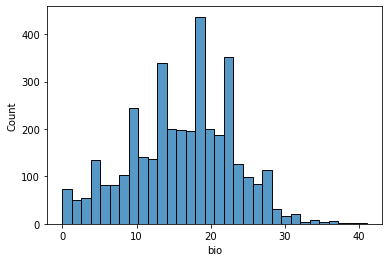

In [91]:
target_mode = 'thinking'

sample_size = min(len(adf[adf[target_mode]==1]), len(adf[adf[target_mode]==0] ))

typeA = adf[adf[target_mode]==1].sample(sample_size)
typeB = adf[adf[target_mode]==0].sample(sample_size)
print(sample_size)

import seaborn as sns
data_A = typeA[['bio', target_mode]]
data_B = typeB[['bio', target_mode]]
data_df = data_A.append(data_B).sample(frac = 1, random_state = 42).reset_index(drop = True)

sns.histplot(data_df['bio'].apply(lambda x: len(x.split())))

In [92]:
data_df.head()

,bio,thinking
0,ADC jugando para - 🏳️‍🌈 - - ♐🌞 ♏🌙 ↗️♊,0.0
1,Californian. . Book designer. Passionate abou...,0.0
2,172/55/2n/031 뭔가 지쳣지만! 그래도 힘내자구!! MBTI성향 -,0.0
3,It's not just a #data point! - the bridge bet...,0.0
4,bts 1365244,0.0


In [93]:
dfTrain, dfTest = train_test_split(data_df, random_state = 32, test_size = 0.1)

dfTrain.columns = ['clean_text', 'category']
dfTest.columns = ['clean_text', 'category']

dfTrain.reset_index(inplace= True, drop = True)
dfTest.reset_index(inplace= True, drop = True)
#extvert_dfTrain, exvert_dfTest = lucem_illud.trainTestSplit(extravert_df500, holdBackFraction =0.1)

array([[' software dev | tweets candidly abt the public sector, tech, gadgets, #data | opinions = mine | she/her | # | #unplug #getoutside',
        0.0, array([0., 0., 0., ..., 0., 0., 0.])],
       [' 🎥🎙📷 Multihyphenate, journalist & broadcaster 🎭 Theatre podcaster 💡 🏳️\u200d🌈 he/him',
        1.0, array([0., 0., 0., ..., 0., 0., 0.])],
       [' Cardinal x Engr x x Panther x Choleric', 1.0,
        array([0., 0., 0., ..., 0., 0., 0.])],
       ...,
       [' Gardening coach, blogger, podcaster. Unashamed owner of a too-loud laugh. #. Furious snowflake. Tea room, not coffee shop. More shabby than chic 🇪🇺',
        1.0, array([0., 0., 0., ..., 0., 0., 0.])],
       [" I used to be young and beautiful. Now I'm just impious, Swedish harlot. , sapiosexual and fan of the Oxford comma. P411 p17754 FMTY ✈",
        1.0, array([0., 0., 0., ..., 0., 0., 0.])],
       [' Realtor at Caul Group Residential Founder of Style Collective Interior designer, public speaker, etc. MBA,',
        1.0, ar

In [63]:
logit_reg_PCA(dfTrain, dfTest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


training accuracy: 0.8397493285586393
testing accuracy: 0.6809651474530831


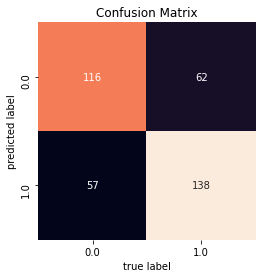

In [94]:
extr_NB = naive_bayes(dfTrain, dfTest)

In [ ]:
extr_NB[1] #testing results

In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Intro vs Extraverts', 'TestError': 1-extr_NB[1]}, ignore_index = True)

In [ ]:
extravert_df500['normalized_text']

2730    ['need', 'confess', 'store', 'wear', 'mask', '...
2092    ['bye', 'weird', 'seriously', 'thank', 'think'...
1758    ['y', 'hit', 'tweet', 'act', 'like', '123movie...
398     ['dragraceuk', 'tell', 'mum', 'class', 'clinic...
531     ['try', 'create', 'custom', 'hongbao', 'kid', ...
                              ...                        
1894    ['buy', 'swag', 'president', 'day', 'weekend',...
2535    ['worry', 'mr', 'president', 'trial', '14-year...
1366    ['important', 'point', 'rephrase', 'prodmgmt',...
3256    ['time', 'manage', 'draw', 'personal', 'honor'...
2606    ['retire', 'space', 'shuttle', 'program', 'hav...
Name: normalized_text, Length: 500, dtype: object

In [ ]:
#extraSVMeval = SVM(extravert_df500, test_frac)

In [ ]:
#print(extraSVMeval)

In [ ]:
#ex_avSVM_err = (extraSVMeval['Error_Rate'][0] + extraSVMeval['Error_Rate'][1])/2
#results_df = results_df.append({'Model': 'SVM', 'Data': 'Full Set Intro vs Extraverts', 'TestError': 1-ex_avSVM_err}, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


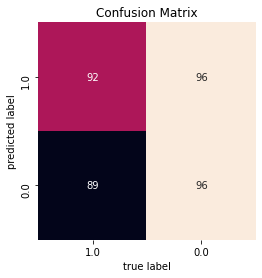

In [35]:
extraNNeval = NeuralNet(dfTrain, dfTest)
#where 'True' is extravert and 'False' is introvert

In [36]:
print(extraNNeval)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0.0         0.495979  0.504144   0.489362           0.487342  0.508287
1.0         0.495979  0.504144   0.518919           0.516832  0.500000


In [ ]:
ex_avNN_err = (extraNNeval['Error_Rate'][0] + extraNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Intro vs Extraverts', 'TestError': ex_avNN_err}, ignore_index = True)

## Intuitive vs. Observant
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
intuitive_df500 = intuitive_df.sample(500)

In [ ]:
#N_dfTrain, N_dfTest = lucem_illud.trainTestSplit(intuitive_df500, holdBackFraction =0.1)
N_dfTrain, N_dfTest = sample_combo_df(intuitive_df, intuitive_df, intuitive, True, num_obs, test_frac)

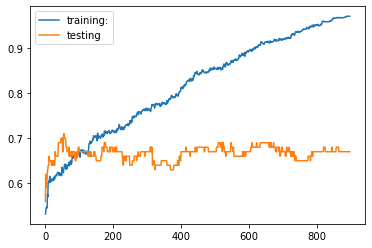

In [ ]:
logit_reg_PCA(N_dfTrain, N_dfTest)

training accuracy: 0.9511111111111111
testing accuracy: 0.64


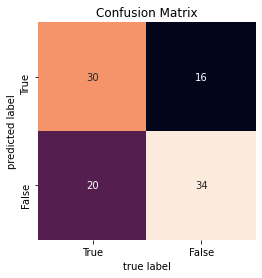

In [ ]:
intuitNB = naive_bayes(N_dfTrain, N_dfTest)

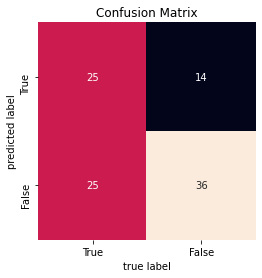

In [ ]:
intuitNNeval = NeuralNet(N_dfTrain, N_dfTest)

In [ ]:
print(intuitNNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.39  0.61   0.641026           0.570513    0.50
True            0.39  0.61   0.590164           0.564918    0.72


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Intuitive vs Observant', 'TestError': 1-intuitNB[1]}, ignore_index = True)
intuit_avNN_err = (intuitNNeval['Error_Rate'][0] + intuitNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Intuitive vs Observant', 'TestError': intuit_avNN_err}, ignore_index = True)

## Judging vs. Prospecting
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
judging_df500 = judging_df.sample(500)

In [ ]:
#J_dfTrain, J_dfTest = lucem_illud.trainTestSplit(judging_df500, holdBackFraction =0.1)
J_dfTrain, J_dfTest = sample_combo_df(judging_df, judging_df, judging, True, num_obs, test_frac)

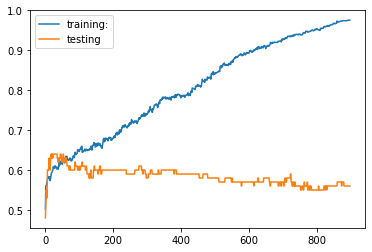

In [ ]:
logit_reg_PCA(J_dfTrain, J_dfTest)

training accuracy: 0.97
testing accuracy: 0.6


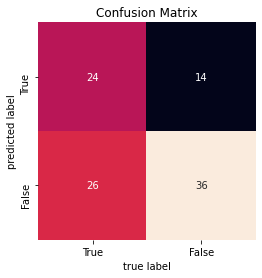

In [ ]:
judgNB = naive_bayes(J_dfTrain, J_dfTest)

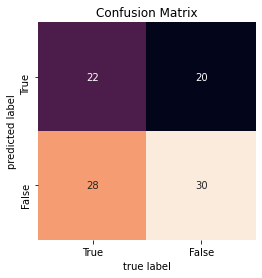

In [ ]:
judgNNeval = NeuralNet(J_dfTrain, J_dfTest)

In [ ]:
print(judgNNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.48  0.52   0.523810           0.510476    0.44
True            0.48  0.52   0.517241           0.510345    0.60


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Judging vs Prospecting', 'TestError': 1-judgNB[1]}, ignore_index = True)
j_avNN_err = (judgNNeval['Error_Rate'][0] + judgNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Judging vs Prospecting', 'TestError': j_avNN_err}, ignore_index = True)

## Thinking vs. Feeling
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
thinking_df500 = intuitive_df.sample(500)

In [ ]:
T_dfTrain, T_dfTest = sample_combo_df(thinking_df, thinking_df, thinking, True, num_obs, test_frac)
#T_dfTrain, T_dfTest = lucem_illud.trainTestSplit(thinking_df500, holdBackFraction =0.1)

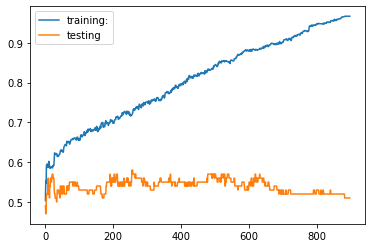

In [ ]:
logit_reg_PCA(T_dfTrain, T_dfTest)

training accuracy: 0.9211111111111111
testing accuracy: 0.54


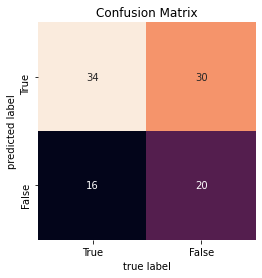

In [ ]:
thinkNB = naive_bayes(T_dfTrain, T_dfTest)

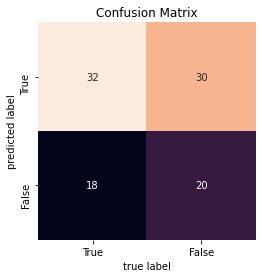

In [ ]:
thinkNNeval = NeuralNet(T_dfTrain, T_dfTest)

In [ ]:
print(thinkNNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.48  0.52   0.516129           0.510323    0.64
True            0.48  0.52   0.526316           0.510526    0.40


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Thinking vs Feeling', 'TestError': 1-thinkNB[1]}, ignore_index = True)
t_avNN_err = (thinkNNeval['Error_Rate'][0] + thinkNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Thinking vs Feeling', 'TestError': t_avNN_err}, ignore_index = True)

## Analyst vs. Else
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
analyst_df500 = analyst_df.sample(500)

In [ ]:
NT_dfTrain, NT_dfTest = sample_combo_df(analyst_df, analyst_df, analyst, True, num_obs, test_frac)
#NT_dfTrain, NT_dfTest = lucem_illud.trainTestSplit(analyst_df500, holdBackFraction =0.1)

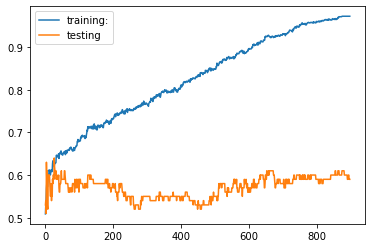

In [ ]:
logit_reg_PCA(NT_dfTrain, NT_dfTest)

training accuracy: 0.9644444444444444
testing accuracy: 0.58


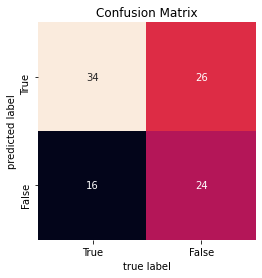

In [ ]:
anlstNB = naive_bayes(NT_dfTrain, NT_dfTest)

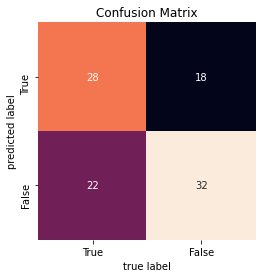

In [ ]:
anlstNNeval = NeuralNet(NT_dfTrain, NT_dfTest)

In [ ]:
print(anlstNNeval)

          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False            0.4  0.6   0.608696           0.560870    0.56
True             0.4  0.6   0.592593           0.559259    0.64


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Analyst vs Else', 'TestError': 1-anlstNB[1]}, ignore_index = True)
anlst_avNN_err = (anlstNNeval['Error_Rate'][0] + anlstNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Analyst vs Else', 'TestError': anlst_avNN_err}, ignore_index = True)

## Diplomat vs. Else
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
diplomat_df500 = diplomat_df.sample(500)

In [ ]:
NF_dfTrain, NF_dfTest = sample_combo_df(diplomat_df, diplomat_df, diplomat, True, num_obs, test_frac)
#NF_dfTrain, NF_dfTest = lucem_illud.trainTestSplit(diplomat_df500, holdBackFraction =0.1)

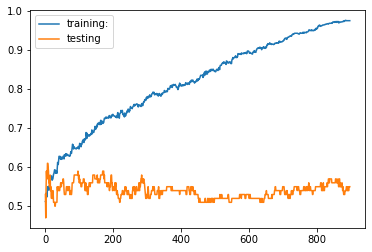

In [ ]:
logit_reg_PCA(NF_dfTrain, NF_dfTest)

training accuracy: 0.9933333333333333
testing accuracy: 0.53


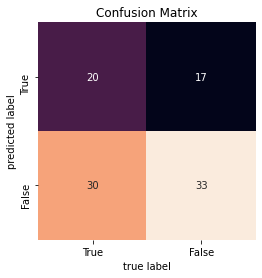

In [ ]:
dipNB = naive_bayes(NF_dfTrain, NF_dfTest)

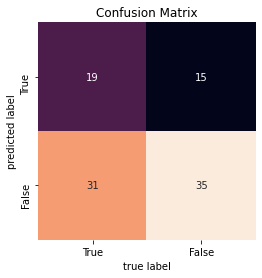

In [ ]:
dipNNeval = NeuralNet(NF_dfTrain, NF_dfTest)

In [ ]:
print(dipNNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.46  0.54   0.558824           0.522353    0.38
True            0.46  0.54   0.530303           0.521212    0.70


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Diplomat vs Else', 'TestError': 1-dipNB[1]}, ignore_index = True)
dip_avNN_err = (dipNNeval['Error_Rate'][0] + dipNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Diplomat vs Else', 'TestError': dip_avNN_err}, ignore_index = True)

## Sentinel vs. Else
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
sentinel_df500 = sentinel_df.sample(500)

In [ ]:
SJ_dfTrain, SJ_dfTest = sample_combo_df(sentinel_df,sentinel_df, sentinel, True, num_obs, test_frac)

#SJ_dfTrain, SJ_dfTest = lucem_illud.trainTestSplit(sentinel_df500, holdBackFraction =0.1)

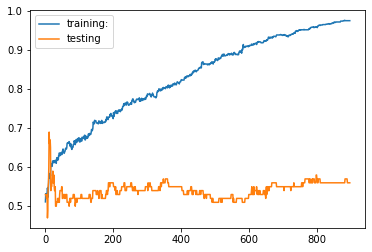

In [ ]:
logit_reg_PCA(SJ_dfTrain, SJ_dfTest)

training accuracy: 0.9733333333333334
testing accuracy: 0.52


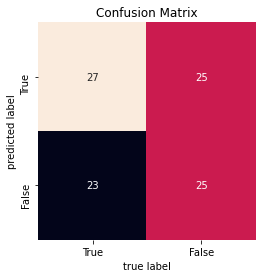

In [ ]:
sentNB = naive_bayes(SJ_dfTrain, SJ_dfTest)

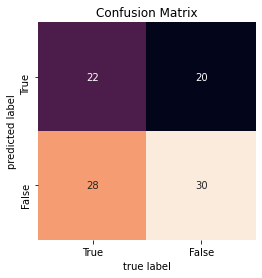

In [ ]:
sentNNeval = NeuralNet(SJ_dfTrain, SJ_dfTest)

In [ ]:
print(sentNNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.48  0.52   0.523810           0.510476    0.44
True            0.48  0.52   0.517241           0.510345    0.60


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Sentinel vs Else', 'TestError': 1-sentNB[1]}, ignore_index = True)
sent_avNN_err = (sentNNeval['Error_Rate'][0] + sentNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Sentinel vs Else', 'TestError': sent_avNN_err}, ignore_index = True)

## Explorer vs. Else
using a sample of 500 of each (with 10% withheld for training)

In [ ]:
explorer_df500 = explorer_df.sample(500)

In [ ]:
SP_dfTrain, SP_dfTest = sample_combo_df(explorer_df, explorer_df, explorer, True, 350, test_frac)

#SP_dfTrain, SP_dfTest = lucem_illud.trainTestSplit(explorer_df500, holdBackFraction =0.1)

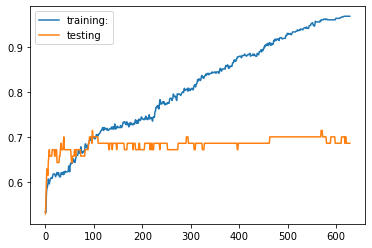

In [ ]:
logit_reg_PCA(SP_dfTrain, SP_dfTest)

training accuracy: 0.8857142857142857
testing accuracy: 0.7428571428571429


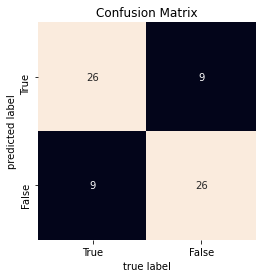

In [ ]:
explNB = naive_bayes(SP_dfTrain, SP_dfTest)

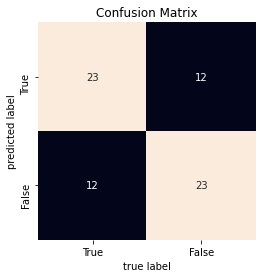

In [ ]:
explNNeval = NeuralNet(SP_dfTrain, SP_dfTest)

In [ ]:
print(explNNeval)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.342857  0.657143   0.657143           0.603265  0.657143
True        0.342857  0.657143   0.657143           0.603265  0.657143


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Explorer vs Else', 'TestError': 1-explNB[1]}, ignore_index = True)
expl_avNN_err = (explNNeval['Error_Rate'][0] + explNNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Explorer vs Else', 'TestError': expl_avNN_err}, ignore_index = True)

In [ ]:
num_obs = 500
test_frac = 0.1
#500 is both computationally feasible and reasonably representative

## Exploring direct comparisons between groupings

## Analyst vs. Diplomat
using a sample of 500 of each (with 10% withheld for training)
where analyst is 'True' in category and Diplomat is 'false'

In [ ]:
#SP_dfTrain, SP_dfTest = sample_combo_df(explorer_df, explorer_df, True, num_obs, test_frac)

an_dip_dfTrain, an_dip_dfTest = sample_combo_df(analyst_df, diplomat_df, analyst, False, num_obs, test_frac)

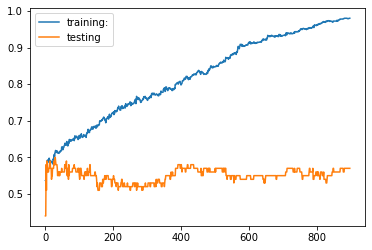

In [ ]:
logit_reg_PCA(an_dip_dfTrain, an_dip_dfTest)

training accuracy: 0.9722222222222222
testing accuracy: 0.51


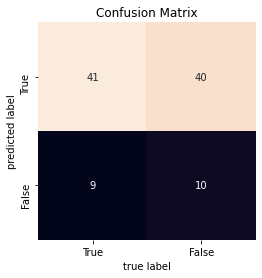

In [ ]:
an_dipNB = naive_bayes(an_dip_dfTrain, an_dip_dfTest)

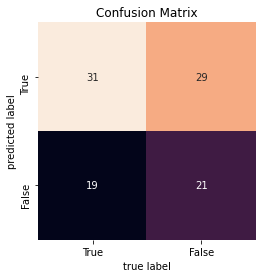

In [ ]:
an_dip_NNeval = NeuralNet(an_dip_dfTrain, an_dip_dfTest)

In [ ]:
print(an_dip_NNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.48  0.52   0.516667           0.510333    0.62
True            0.48  0.52   0.525000           0.510500    0.42


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Analyst vs Diplomat', 'TestError': 1-an_dipNB[1]}, ignore_index = True)
an_dipavNN_err = (an_dip_NNeval['Error_Rate'][0] + an_dip_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Analyst vs Diplomat', 'TestError': an_dipavNN_err}, ignore_index = True)

## Analyst vs. Sentinel
using a sample of 500 of each (with 10% withheld for training)

where analyst is 'True' in category and Sentinel is 'false'

In [ ]:
an_sent_dfTrain, an_sent_dfTest = sample_combo_df(analyst_df, sentinel_df, analyst, False, num_obs, test_frac)
#an_sent_dfTrain, an_sent_dfTest = sample_combo_df(analyst_df, analyst, sentinel, num_obs, test_frac)

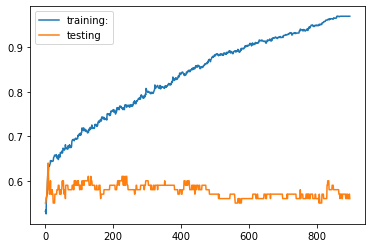

In [ ]:
logit_reg_PCA(an_sent_dfTrain, an_sent_dfTest)

training accuracy: 0.9244444444444444
testing accuracy: 0.58


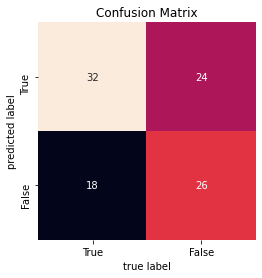

In [ ]:
an_sentNB = naive_bayes(an_sent_dfTrain, an_sent_dfTest)

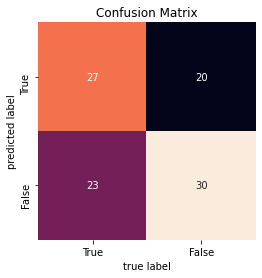

In [ ]:
an_sent_NNeval = NeuralNet(an_sent_dfTrain, an_sent_dfTest)

In [ ]:
print(an_sent_NNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.43  0.57   0.574468           0.540213    0.54
True            0.43  0.57   0.566038           0.539623    0.60


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Analyst vs Sentinel', 'TestError': 1-an_sentNB[1]}, ignore_index = True)
an_sent_avNN_err = (an_sent_NNeval['Error_Rate'][0] + an_sent_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Analyst vs Sentinel', 'TestError': an_sent_avNN_err}, ignore_index = True)

## Analyst vs. Explorer
using a sample of 500 of each (with 10% withheld for training)

where analyst is 'True' in category and Explorer is 'false'

In [ ]:
an_expl_dfTrain, an_expl_dfTest = sample_combo_df(analyst_df, explorer_df, analyst, False, 350, test_frac)

note here: size of samples is different due to an issue in the data representation

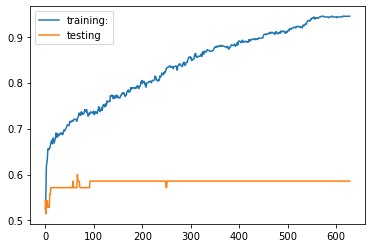

In [ ]:
logit_reg_PCA(an_expl_dfTrain, an_expl_dfTest)

training accuracy: 0.8571428571428571
testing accuracy: 0.5714285714285714


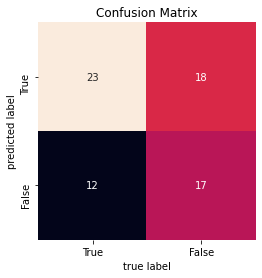

In [ ]:
an_explNB = naive_bayes(an_expl_dfTrain, an_expl_dfTest)

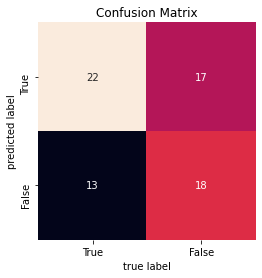

In [ ]:
an_expl_NNeval = NeuralNet(an_expl_dfTrain, an_expl_dfTest)

In [ ]:
an_expl_dfTest['category'].sum()

35

In [ ]:
print(an_expl_NNeval)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.428571  0.571429   0.564103           0.540293  0.628571
True        0.428571  0.571429   0.580645           0.541475  0.514286


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Analyst vs Explorer', 'TestError': 1-an_explNB[1]}, ignore_index = True)
an_expl_avNN_err = (an_expl_NNeval['Error_Rate'][0] + an_expl_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Analyst vs Explorer', 'TestError': an_expl_avNN_err}, ignore_index = True)

## Diplomat vs. Sentinel
using a sample of 500 of each (with 10% withheld for training)

where Diplomat is 'True' in category and Sentinel is 'false'

In [ ]:
dip_sent_dfTrain, dip_sent_dfTest = sample_combo_df(diplomat_df, sentinel_df, diplomat, False, num_obs, test_frac)

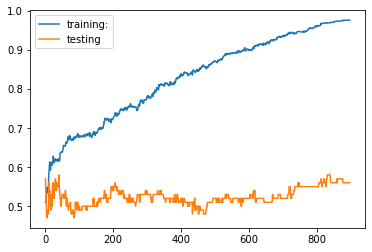

In [ ]:
logit_reg_PCA(dip_sent_dfTrain, dip_sent_dfTest)

training accuracy: 0.9788888888888889
testing accuracy: 0.52


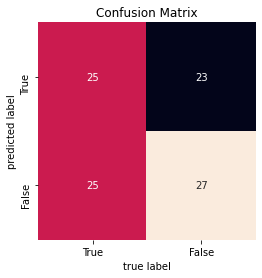

In [ ]:
dip_sentNB = naive_bayes(dip_sent_dfTrain, dip_sent_dfTest)

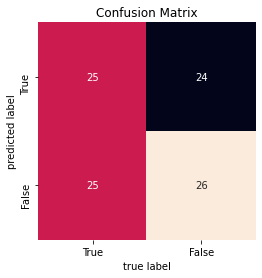

In [ ]:
dip_sent_NNeval = NeuralNet(dip_sent_dfTrain, dip_sent_dfTest)

In [ ]:
print(dip_sent_NNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.49  0.51   0.510204           0.505102    0.50
True            0.49  0.51   0.509804           0.505098    0.52


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Diplomat vs Sentinel', 'TestError': 1-dip_sentNB[1]}, ignore_index = True)
dip_sent_avNN_err = (dip_sent_NNeval['Error_Rate'][0] + dip_sent_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Diplomat vs Sentinel', 'TestError': dip_sent_avNN_err}, ignore_index = True)

## Diplomat vs. Explorer
using a sample of 500 of each (with 10% withheld for training)

where Diplomat is 'True' in category and Explorer is 'false'

In [ ]:
dip_expl_dfTrain, dip_expl_dfTest = sample_combo_df(diplomat_df, explorer_df, diplomat, False, 350, test_frac)

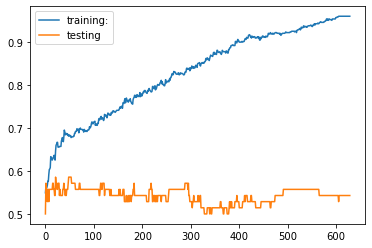

In [ ]:
logit_reg_PCA(dip_expl_dfTrain, dip_expl_dfTest)

training accuracy: 0.8825396825396825
testing accuracy: 0.5714285714285714


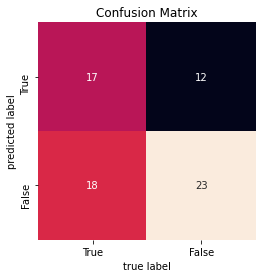

In [ ]:
dip_explNB = naive_bayes(dip_expl_dfTrain, dip_expl_dfTest)

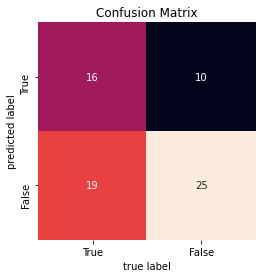

In [ ]:
dip_expl_NNeval = NeuralNet(dip_expl_dfTrain, dip_expl_dfTest)

In [ ]:
print(dip_expl_NNeval)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.414286  0.585714   0.615385           0.552747  0.457143
True        0.414286  0.585714   0.568182           0.548701  0.714286


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Diplomat vs Explorer', 'TestError': 1-dip_explNB[1]}, ignore_index = True)
dip_expl_avNN_err = (dip_expl_NNeval['Error_Rate'][0] + dip_expl_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Diplomat vs Explorer', 'TestError': dip_expl_avNN_err}, ignore_index = True)

## Explorer vs. Sentinel
using a sample of 500 of each (with 10% withheld for training)

where Explorer is 'True' in category and Sentinel is 'false'

In [ ]:
sent_expl_dfTrain, sent_expl_dfTest = sample_combo_df(explorer_df, sentinel_df, explorer, False, 350, test_frac)

In [ ]:
#sentinel_df['SJ'].sum()

730

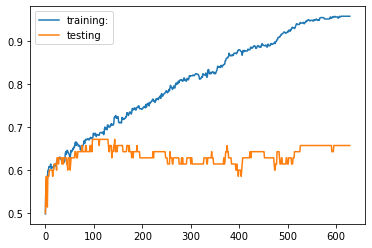

In [ ]:
logit_reg_PCA(sent_expl_dfTrain, sent_expl_dfTest)
#sentinel_df.tail()

training accuracy: 0.8904761904761904
testing accuracy: 0.6


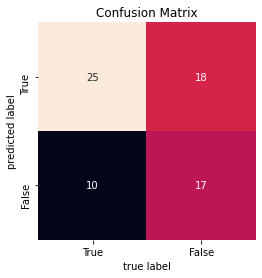

In [ ]:
sent_explNB= naive_bayes(sent_expl_dfTrain, sent_expl_dfTest)

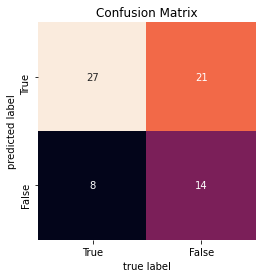

In [ ]:
sent_expl_NNeval = NeuralNet(sent_expl_dfTrain, sent_expl_dfTest)

In [ ]:
print(sent_expl_NNeval)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.414286  0.585714   0.562500           0.548214  0.771429
True        0.414286  0.585714   0.636364           0.554545  0.400000


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Sentinel vs Explorer', 'TestError': 1-sent_explNB[1]}, ignore_index = True)
sent_expl_avNN_err = (sent_expl_NNeval['Error_Rate'][0] + sent_expl_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Sentinel vs Explorer', 'TestError': sent_expl_avNN_err}, ignore_index = True)

## Exploring additional personality pairings:

## Observant and Feeling (SF) vs Else

using a sample of 500 of each (with 10% withheld for training)

where SF is 'True' in category and else is 'false'

In [ ]:
SF_df500 = SF_df.sample(500)

In [ ]:
obs_feel_dfTrain, obs_feel_dfTest = sample_combo_df(SF_df, SF_df, 'SF', True, num_obs, test_frac)

#obs_feel_dfTrain, obs_feel_dfTest = lucem_illud.trainTestSplit(SF_df500, holdBackFraction =0.1)

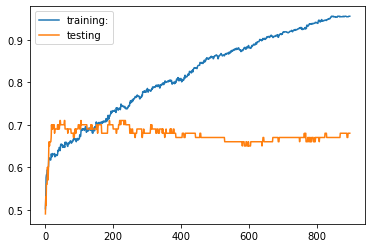

In [ ]:
logit_reg_PCA(obs_feel_dfTrain, obs_feel_dfTest)

training accuracy: 0.8933333333333333
testing accuracy: 0.64


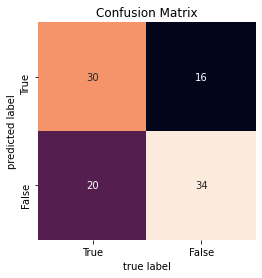

In [ ]:
obs_feelNB = naive_bayes(obs_feel_dfTrain, obs_feel_dfTest)

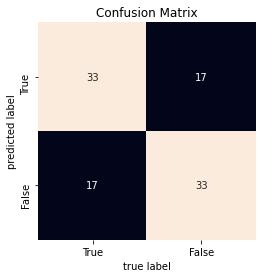

In [ ]:
obs_feel_NNeval = NeuralNet(obs_feel_dfTrain, obs_feel_dfTest)

In [ ]:
print(obs_feel_NNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.34  0.66       0.66             0.6056    0.66
True            0.34  0.66       0.66             0.6056    0.66


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Observant and Feeling vs Else', 'TestError': 1-obs_feelNB[1]}, ignore_index = True)
obs_feel_avNN_err = (obs_feel_NNeval['Error_Rate'][0] + obs_feel_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Observant and Feeling vs Else', 'TestError': obs_feel_avNN_err}, ignore_index = True)

## Observant and Thinking (ST)

using a sample of 500 of each (with 10% withheld for training)

where SF is 'True' in category and else is 'false'

In [ ]:
ST_df500 = ST_df.sample(500)

In [ ]:
obs_thi_dfTrain, obs_thi_dfTest = sample_combo_df(ST_df, ST_df, 'ST', True, 350, test_frac)

#obs_thi_dfTrain, obs_thi_dfTest = lucem_illud.trainTestSplit(ST_df500, holdBackFraction =0.1)

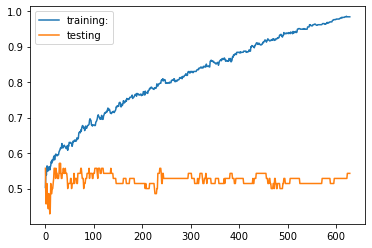

In [ ]:
logit_reg_PCA(obs_thi_dfTrain, obs_thi_dfTest)

training accuracy: 0.9777777777777777
testing accuracy: 0.5


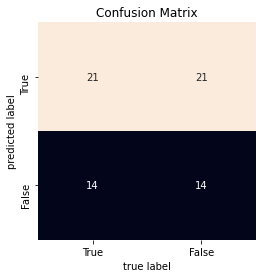

In [ ]:
obs_thiNB = naive_bayes(obs_thi_dfTrain, obs_thi_dfTest)

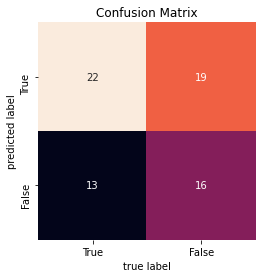

In [ ]:
obs_thi_NNeval = NeuralNet(obs_thi_dfTrain, obs_thi_dfTest)

In [ ]:
print(obs_thi_NNeval)

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.457143  0.542857   0.536585           0.522997  0.628571
True        0.457143  0.542857   0.551724           0.523645  0.457143


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Observant and Thinking vs Else', 'TestError': 1-obs_thiNB[1]}, ignore_index = True)
obs_thi_avNN_err = (obs_thi_NNeval['Error_Rate'][0] + obs_thi_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Observant and Thinking vs Else', 'TestError': obs_thi_avNN_err}, ignore_index = True)

## Intuitive and Judging (NJ)

using a sample of 500 of each (with 10% withheld for training)

where SF is 'True' in category and else is 'false'

In [ ]:
NJ_df500 = NJ_df.sample(500)

In [ ]:
int_judg_dfTrain, int_judg_dfTest = sample_combo_df(NJ_df, NJ_df, 'NJ', True, num_obs, test_frac)

#int_judg_dfTrain, int_judg_dfTest = lucem_illud.trainTestSplit(NJ_df500, holdBackFraction =0.1)

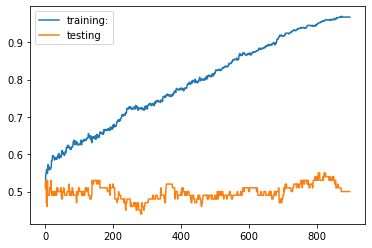

In [ ]:
logit_reg_PCA(int_judg_dfTrain, int_judg_dfTest)

training accuracy: 0.94
testing accuracy: 0.52


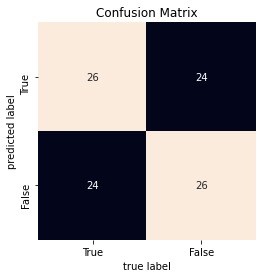

In [ ]:
int_judgNB = naive_bayes(int_judg_dfTrain, int_judg_dfTest)

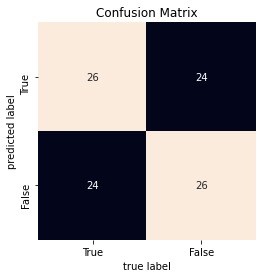

In [ ]:
int_judg_NNeval = NeuralNet(int_judg_dfTrain, int_judg_dfTest)

In [ ]:
print(int_judg_NNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.48  0.52       0.52             0.5104    0.52
True            0.48  0.52       0.52             0.5104    0.52


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Intuitive and Judging vs Else', 'TestError': 1-int_judgNB[1]}, ignore_index = True)
int_judg_avNN_err = (int_judg_NNeval['Error_Rate'][0] + int_judg_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Intuitive and Judging vs Else', 'TestError': int_judg_avNN_err}, ignore_index = True)

## Intuitive and Prospecting (NP)

using a sample of 500 of each (with 10% withheld for training)

where SF is 'True' in category and else is 'false'

In [ ]:
NP_df500 = NP_df.sample(500)

In [ ]:
int_pro_dfTrain, int_pro_dfTest = sample_combo_df(NP_df, NP_df, 'NP', True, num_obs, test_frac)
#int_pro_dfTrain, int_pro_dfTest = lucem_illud.trainTestSplit(NP_df500, holdBackFraction =0.1)

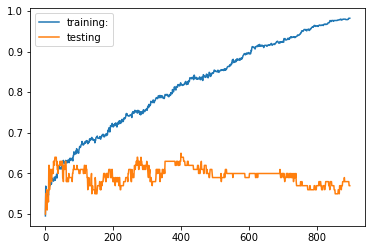

In [ ]:
logit_reg_PCA(int_pro_dfTrain, int_pro_dfTest)

training accuracy: 0.9922222222222222
testing accuracy: 0.55


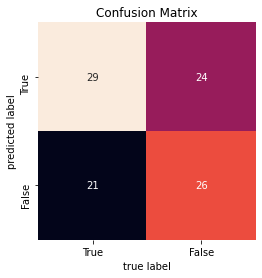

In [ ]:
int_prospNB = naive_bayes(int_pro_dfTrain, int_pro_dfTest)

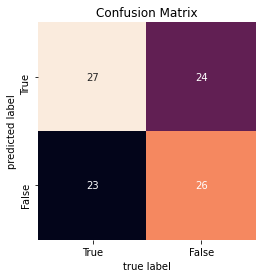

In [ ]:
int_pro_NNeval = NeuralNet(int_pro_dfTrain, int_pro_dfTest)

In [ ]:
print(int_pro_NNeval)

          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
False           0.47  0.53   0.529412           0.515882    0.54
True            0.47  0.53   0.530612           0.515918    0.52


In [ ]:
results_df = results_df.append({'Model': 'Naive Bayes', 'Data': 'Intuitive and Prospecting vs Else', 'TestError': 1-int_prospNB[1]}, ignore_index = True)
int_pro_avNN_err = (int_pro_NNeval['Error_Rate'][0] + int_pro_NNeval['Error_Rate'][1])/2
results_df = results_df.append({'Model': 'NN', 'Data': 'Intuitive and Prospecting vs Else', 'TestError': int_pro_avNN_err}, ignore_index = True)

## now let's look at the dataframe for the error results:

In [ ]:
results_df.to_csv('Data/error_results500FINAL.csv')

In [ ]:
results_df.sort_values(by='TestError')

,Model,Data,TestError
14,Naive Bayes,Explorer vs Else,0.257143
29,NN,Observant and Feeling vs Else,0.340000
15,NN,Explorer vs Else,0.342857
1,NN,Intro vs Extraverts,0.350000
2,Naive Bayes,Intuitive vs Observant,0.360000
28,Naive Bayes,Observant and Feeling vs Else,0.360000
0,Naive Bayes,Intro vs Extraverts,0.380000
3,NN,Intuitive vs Observant,0.390000
4,Naive Bayes,Judging vs Prospecting,0.400000
9,NN,Analyst vs Else,0.400000


## Now to analyze the classification of the 4 binary factors, 4 groups and 16 personality types against each other:

In [ ]:
p_tweetsDF.head()

,Unnamed: 0,Unnamed: 0.1,liked_by,text,type,extravert,intuitive,thinking,judging,NT,...,ST,NJ,NP,SJ,SP,foreign_frac,clean_text,tokenized_text,normalized_text,category
0,0,0,1271680686576058368,just found out someone confessed /r feelings t...,ESTP,1,0,1,0,0,...,1,0,0,0,1,0.3094,just found out someone confessed /r feelings t...,"['just', 'found', 'out', 'someone', 'confessed...","['find', 'confess', '/r', 'feeling', 'oliver',...",False
1,1,1,14283777,Wait. Who called him the “Italian Stallion”???...,ESTP,1,0,1,0,0,...,1,0,0,0,1,0.2267,Wait. Who called him the “Italian Stallion”???...,"['Wait', 'Who', 'called', 'him', 'the', 'Itali...","['wait', 'call', 'italian', 'stallion', 'grate...",False
2,2,5,956641603384377346,"""This is like two of my Uncles fighting at the...",ESTP,1,0,1,0,0,...,1,0,0,0,1,0.2888,"""This is like two of my Uncles fighting at the...","['This', 'is', 'like', 'two', 'of', 'my', 'Unc...","['like', 'uncle', 'fight', 'bbq', 'tysonvsjone...",False
3,3,6,975396348504821766,ur welcome https://t.co/e2KF57KLxbI'm losing m...,ESTP,1,0,1,0,0,...,1,0,0,0,1,0.3575,ur welcome losing my fucking mind : mfs with c...,"['ur', 'welcome', 'losing', 'my', 'fucking', '...","['ur', 'welcome', 'lose', 'fuck', 'mind', 'mfs...",False
4,4,7,1053019674600976385,https://t.co/DFf1NhbRq5If You’re Too Shy (Let ...,ESTP,1,0,1,0,0,...,1,0,0,0,1,0.4863,You’re Too Shy (Let Me Know) by The 1975 2017 ...,"['You', '’re', 'Too', 'Shy', 'Let', 'Me', 'Kno...","['shy', 'let', 'know', 'kiss', 'long', 'eye', ...",False


In [ ]:
#in respective columns
list_p_binarys_cols = [5, 6, 7, 8]
list_p_binarys = [extravert, intuitive, thinking, judging]

#in respective columns
list_p_groups_cols = [9, 11, 15, 16]
list_p_groups = [analyst, diplomat, sentinel, explorer]

#in column number 4
list_16_p_types_cols = [4]
list_16_p_types = ['ENTP', 'ENTJ', 'ENFP', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ', 'INTP', 'INTJ', 'INFP', 'INFJ', 'ISTP', 'ISTJ', 'ISFP', 'ISFJ']

In [ ]:
def categorize_multi(df, list_attributes, list_cols):
    '''similar to categorize function, but works for multiple attributes'''
    temp_df = copy.deepcopy(df)
    #df.iloc[1].apply(int)
    for attribute in list_attributes:
        for i in range(len(temp_df)):
            if temp_df.iloc[i].loc['category'] == 1 or temp_df.iloc[i].loc['category'] == attribute:
                print("match of ", attribute, "at location", i)
                #column 21 is category
                temp_df.at[i, 21] = str(attribute)
                temp_df.iloc[i].loc['category'] = copy.deepcopy(str(attribute))
                #print("now value in row", i, "is:", temp_df.iloc[i].loc['category'])
                    
    return temp_df

In [ ]:
def create_even_df(uneven_df, list_attributes, num_obs, col):
    '''similar to categorize function, but works for multiple attributes'''
    temp_df = copy.deepcopy(uneven_df)
    new_df = pandas.DataFrame()
    
    #matching_df = categorize(temp_df, attribute)
    for attribute in list_attributes:
        if attribute == 'ESTP' and num_obs > 46:
            num_obs1 = 46
        elif attribute == 'ISTP' and num_obs > 83:
            num_obs1 = 83
        elif attribute == 'ESFP' and num_obs > 105:
            num_obs1 = 105
        elif attribute == 'ISFP' and num_obs > 121:
            num_obs1 = 121
        elif attribute == 'ESFJ' and num_obs > 124:
            num_obs1 = 124
        elif attribute == 'ESTJ' and num_obs > 135:
            num_obs1 = 135
        elif attribute == 'ISTJ' and num_obs > 211:
            num_obs1 = 211
        elif attribute == 'SP' and num_obs > 354:
            num_obs1 = 354
        else:
            num_obs1 = num_obs
        mask = temp_df.loc[:, col] == attribute
        df_mask = copy.deepcopy(temp_df[mask].sample(num_obs1))
        #print(df_mask)
        new_df = new_df.append(df_mask, ignore_index =True)

    return new_df

In [ ]:
def counts_df(df, list_attributes, col):
    
    for attribute in list_attributes:
        count = 0
        for row in df[col]:
            if row == attribute:
                count+=1
        print("count of", attribute, "is:", count)

In [ ]:
counts_df(p_tweetsDF, list_16_p_types, 'type') 
#note: ESTP only has 46, ISTP only has 83, rest have more than 100

count of ENTP is: 272
count of ENTJ is: 276
count of ENFP is: 289
count of ENFJ is: 295
count of ESTP is: 46
count of ESTJ is: 135
count of ESFP is: 105
count of ESFJ is: 124
count of INTP is: 278
count of INTJ is: 456
count of INFP is: 294
count of INFJ is: 293
count of ISTP is: 83
count of ISTJ is: 211
count of ISFP is: 121
count of ISFJ is: 260


In [ ]:
#note: there are only 46 of one p_type so we need even distribution to train the classifier:
even_df = create_even_df(p_tweetsDF, list_16_p_types, 200, 'type')

In [ ]:
counts_df(even_df, list_16_p_types, 'type')

count of ENTP is: 200
count of ENTJ is: 200
count of ENFP is: 200
count of ENFJ is: 200
count of ESTP is: 46
count of ESTJ is: 135
count of ESFP is: 105
count of ESFJ is: 124
count of INTP is: 200
count of INTJ is: 200
count of INFP is: 200
count of INFJ is: 200
count of ISTP is: 83
count of ISTJ is: 200
count of ISFP is: 121
count of ISFJ is: 200


In [ ]:
from sklearn.metrics import confusion_matrix

def multiNB(dataframe, test_frac, col, label_list):
    #need to increase size of test fraction to make the results more inerpretable
    fullTrain, fullTest = lucem_illud.trainTestSplit(dataframe, holdBackFraction=test_frac)

    TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
    TFVects = TFVectorizer.fit_transform(fullTrain['text'])
    fullTrain['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

    MultinomialNB = sklearn.naive_bayes.MultinomialNB()
    MultinomialNB.fit(np.stack(fullTrain['vect'], axis = 0), fullTrain[col])

    fullTrain['nb_predict'] = MultinomialNB.predict(np.stack(fullTrain['vect'], axis=0))
    print("Training score:")
    print(MultinomialNB.score(np.stack(fullTrain['vect'], axis=0), fullTrain[col]))

    #Create vectors
    TFVects_test = TFVectorizer.transform(fullTest['text'])
    fullTest['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

    #Add to df
    fullTest['nb_predict'] = MultinomialNB.predict(np.stack(fullTest['vect'], axis=0))

    #Test
    print("Testing score:")
    print(MultinomialNB.score(np.stack(fullTest['vect'], axis=0), fullTest[col]))

    lucem_illud.metrics.evaluateClassifier(MultinomialNB, fullTest)

    conf_mat = confusion_matrix(fullTest[col], fullTest['nb_predict'])
    fig, ax = plt.subplots(figsize=(10,10))
    seaborn.heatmap(conf_mat, fmt='d',
                   xticklabels= label_list, yticklabels= label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Training score:
0.9019607843137255
Testing score:
0.05263157894736842


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


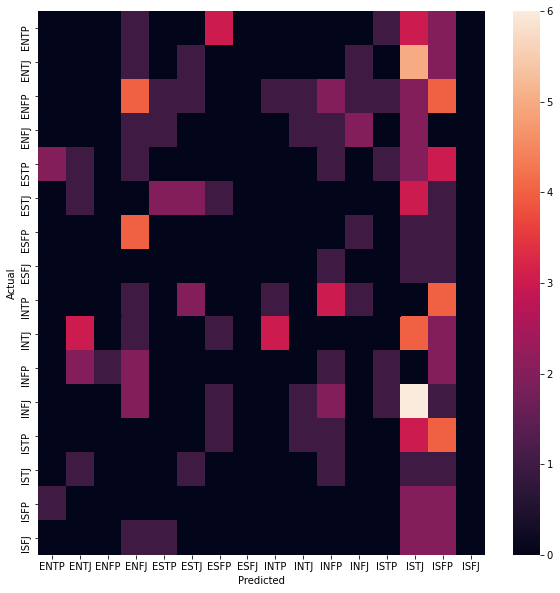

In [ ]:
even_df100 = create_even_df(p_tweetsDF, list_16_p_types, 100, 'type')

multiNB(even_df100, 0.1, 'type', list_16_p_types)

Training score:
0.918918918918919
Testing score:
0.08376963350785341


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


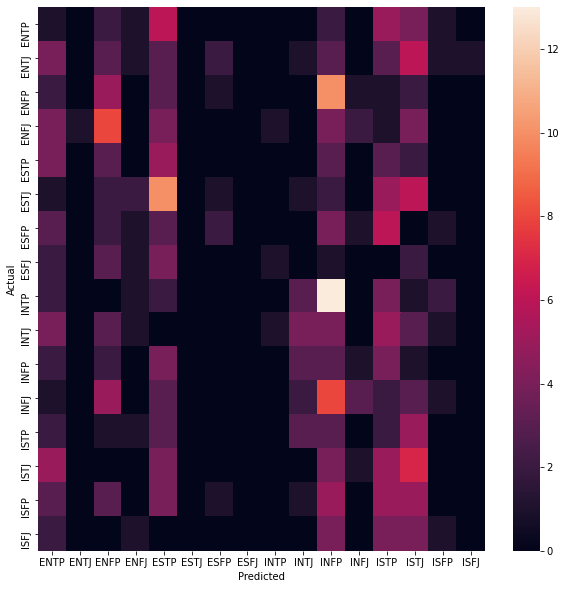

In [ ]:
multiNB(even_df100, 0.25, 'type', list_16_p_types)

Training score:
0.8457288567785806
Testing score:
0.10727969348659004


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


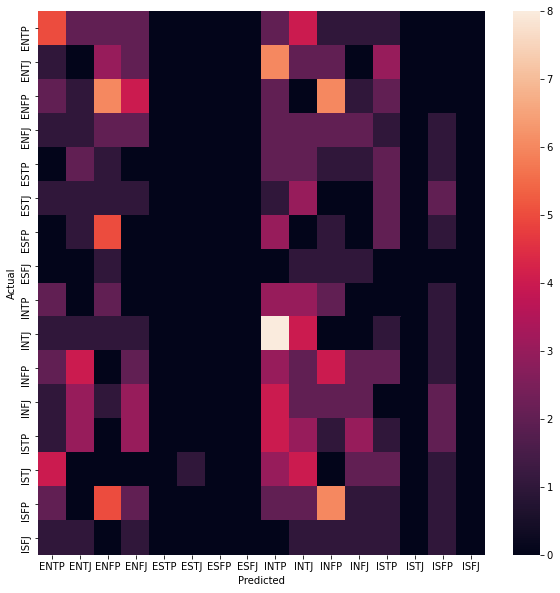

In [ ]:
even_df200 = create_even_df(p_tweetsDF, list_16_p_types, 200, 'type')

multiNB(even_df200, 0.1, 'type', list_16_p_types)

Training score:
0.831718510963794
Testing score:
0.10872894333843798


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


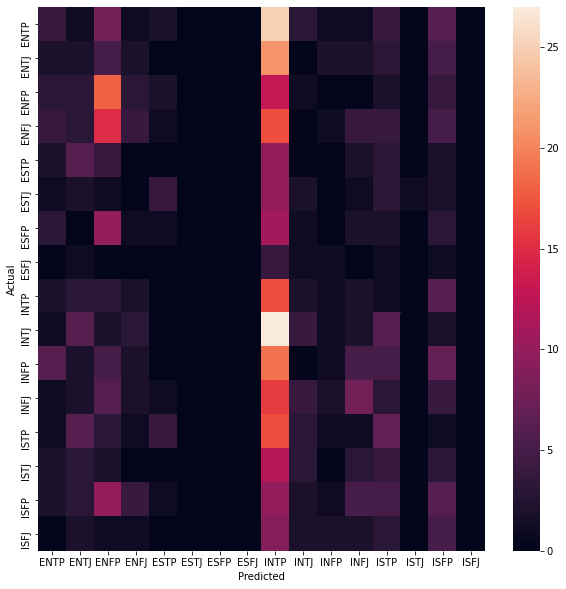

In [ ]:
multiNB(even_df200, 0.25, 'type', list_16_p_types)

Training score:
0.796242774566474
Testing score:
0.1270358306188925


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


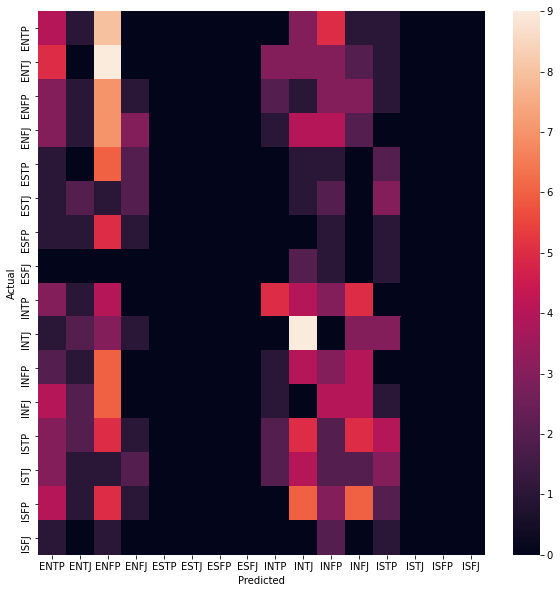

In [ ]:
even_df250 = create_even_df(p_tweetsDF, list_16_p_types, 250, 'type')

multiNB(even_df250, 0.1, 'type', list_16_p_types)

Training score:
0.7863025574338969
Testing score:
0.109375


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


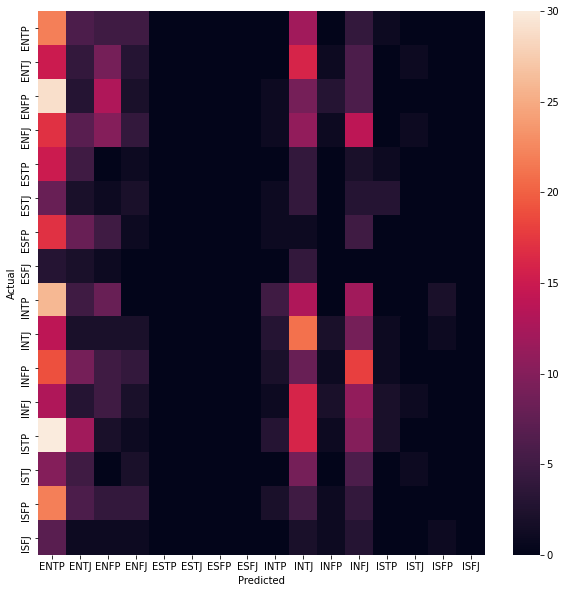

In [ ]:
multiNB(even_df250, 0.25, 'type', list_16_p_types)

In [ ]:
train_an_dip, test_an_dip = sample_combo_df(analyst_df, diplomat_df, analyst, False, 350, 0.1)
train_sent_expl, test_sent_expl = sample_combo_df(explorer_df, sentinel_df, explorer, False, 350, 0.1)

full_train = train_an_dip.append(train_sent_expl, ignore_index =True)
full_test = test_an_dip.append(test_sent_expl, ignore_index =True)

In [ ]:
def categorize(df, list_attributes):
    '''
    '''
    temp_df = copy.deepcopy(df)
    temp_df['group'] = 0
    
    #temp_df['category'] = [trueLabel if categ == 1 else falseLabel for categ in df[attribute]]
    for attribute in list_attributes:
        for i in range(len(df[attribute])):
            if df.iloc[i].loc[attribute] == 1 and temp_df.iloc[i].loc['group'] == 0:
                #temp_df.iloc[i].loc['group'] = attribute
                temp_df.loc[i,22] = attribute
                
        
    #temp_df['group'] = [attribute if: categ == 1 else: break for categ in df[attribute]]
    
    return temp_df

In [ ]:
list_p_groups = [analyst, diplomat, sentinel, explorer]
groupedDF = categorize(p_tweetsDF, list_p_groups)

In [ ]:
counts_df(groupedDF, list_p_groups, 22)

count of NT is: 1282
count of NF is: 1171
count of SJ is: 730
count of SP is: 355


Training score:
0.9261904761904762
Testing score:
0.3


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


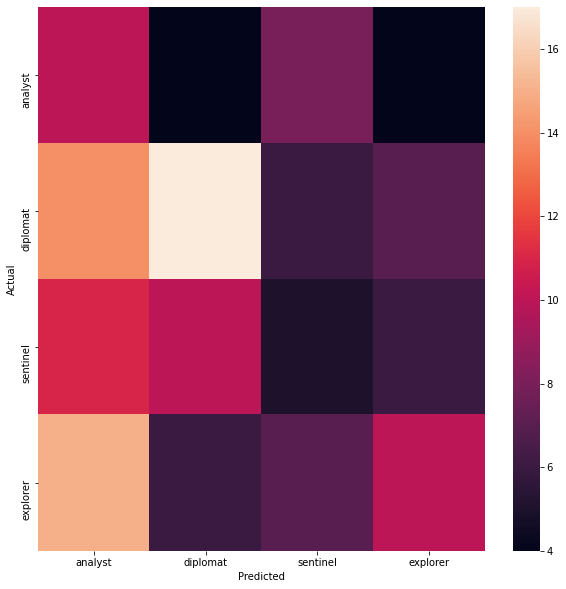

In [ ]:
even_groups350 = create_even_df(groupedDF, list_p_groups, 350, 22)

multiNB(even_groups350, 0.1, 22, ['analyst', 'diplomat', 'sentinel', 'explorer'])

Training score:
0.9266666666666666
Testing score:
0.3142857142857143


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


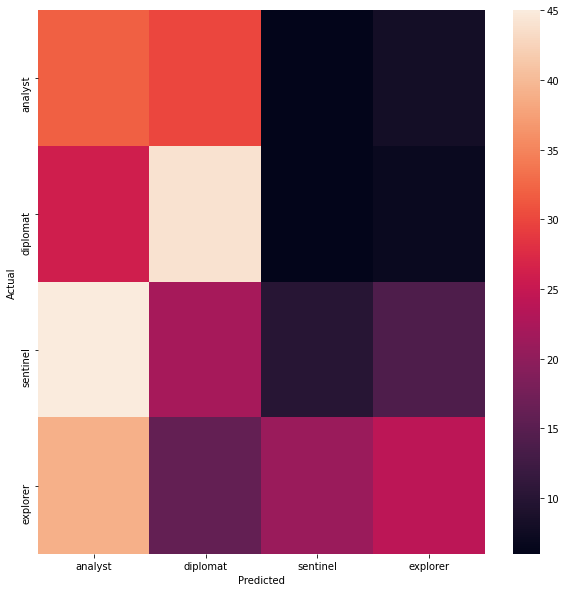

In [ ]:
multiNB(even_groups350, 0.25, 22, ['analyst', 'diplomat', 'sentinel', 'explorer'])

Training score:
0.8234495246717972
Testing score:
0.37551020408163266


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


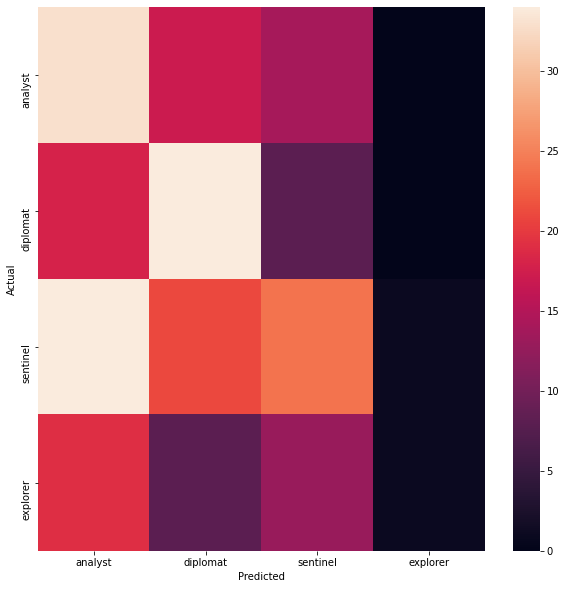

In [ ]:
even_groups700 = create_even_df(groupedDF, list_p_groups, 700, 22)
#note SP (explorer) only has 355 so will be underrepresented in training & testing

multiNB(even_groups700, 0.1, 22, ['analyst', 'diplomat', 'sentinel', 'explorer'])

Training score:
0.8272677892449756
Testing score:
0.399673735725938


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


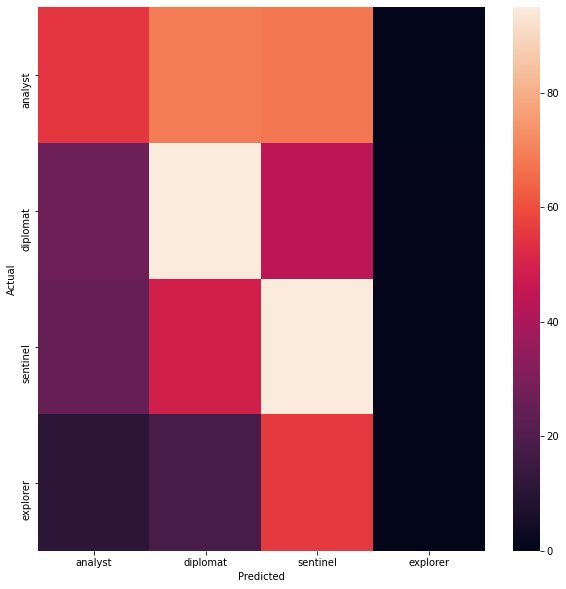

In [ ]:
multiNB(even_groups700, 0.25, 22, ['analyst', 'diplomat', 'sentinel', 'explorer'])